# **Kütüphaneler**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **Veriyi Oku**

In [26]:
df = pd.read_excel("student_lifestyle_dataset_preprocess.xlsx")

# **Modeli Eğitimi**

In [27]:
target_col = "Grades"
feature_cols = [col for col in df.columns if col != target_col]

X = df[feature_cols].values
y = df[[target_col]].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

In [28]:
print("Ortalama kare hatası:", mse)
print("Bias:", model.intercept_[0])
print("Ağırlıklar:")
for name, coef in zip(feature_cols, model.coef_[0]):
    print(f"{name}: {coef}")

Ortalama kare hatası: 0.25540106643714333
Bias: 7.809729458532511
Ağırlıklar:
Study_Hours_Per_Day: 0.5461635912506713
Extracurricular_Hours_Per_Day: -0.023536135082181175
Sleep_Hours_Per_Day: -0.015935873376730463
Social_Hours_Per_Day: 0.0031356150855371898
Stress_Level_Low: 0.01739190634004064
Stress_Level_Moderate: -0.03896222090249761
Gender_Male: -0.01841907122020831
Physical_Activity_Hours_Per_Day_sqrt: -0.004647295908628113


# **Regresyon Görselleştirme**

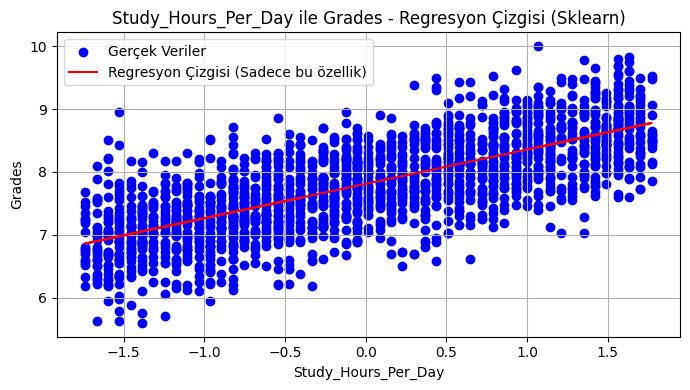

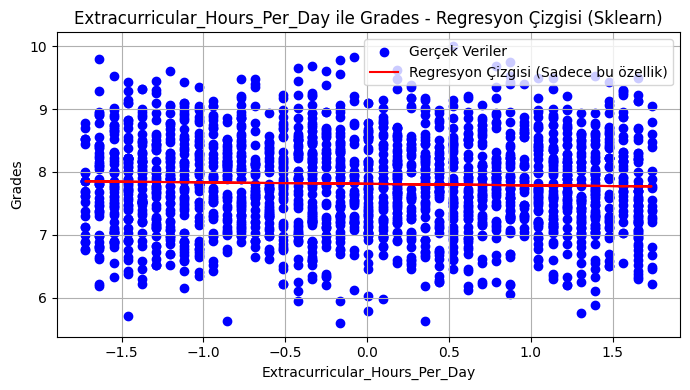

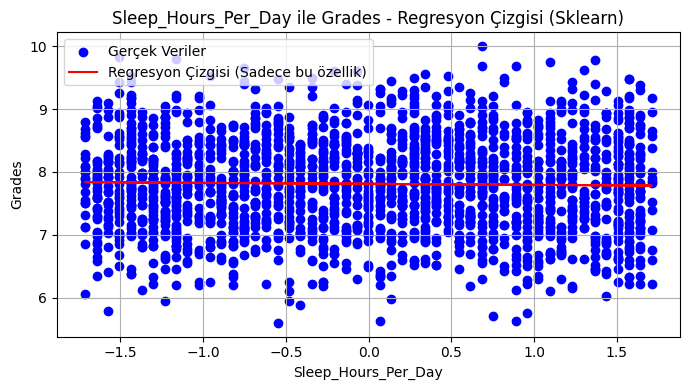

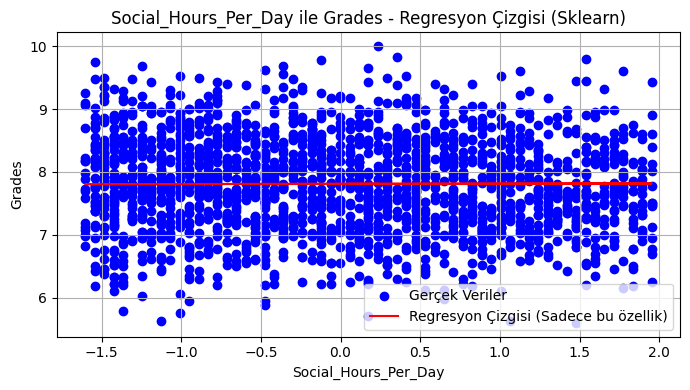

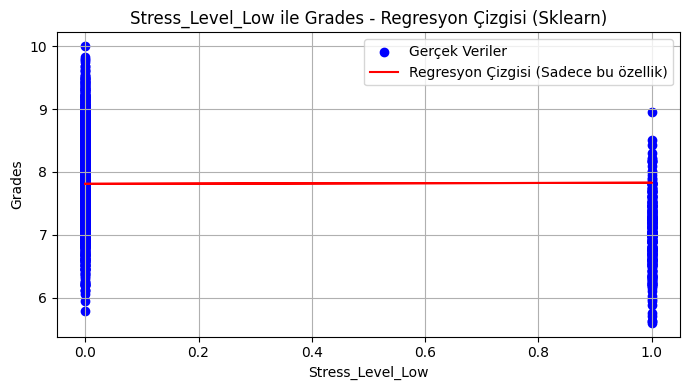

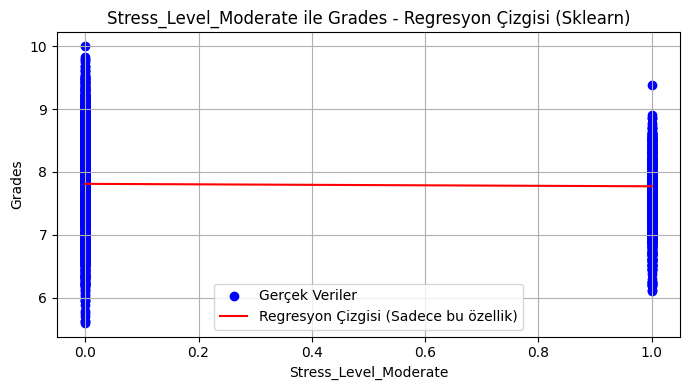

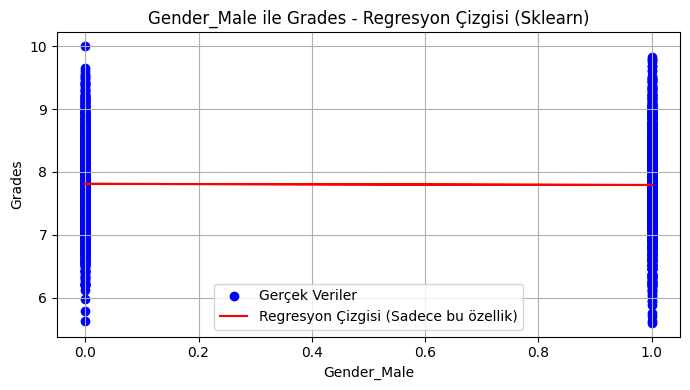

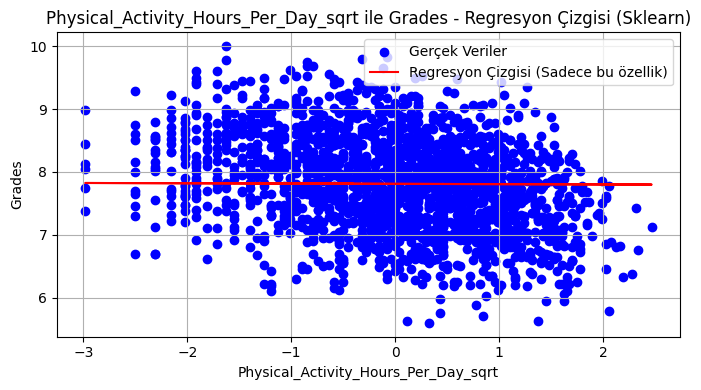

In [29]:
for i, col in enumerate(feature_cols):
    x_feature = df[[col]].values
    y_real = y
    X_partial = np.zeros_like(X)
    X_partial[:, i] = x_feature[:, 0]
    y_pred = model.predict(X_partial)

    plt.figure(figsize=(7, 4))
    plt.scatter(x_feature, y_real, color='blue', label='Gerçek Veriler')
    plt.plot(x_feature, y_pred, color='red', label='Regresyon Çizgisi (Sadece bu özellik)')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"{col} ile {target_col} - Regresyon Çizgisi (Sklearn)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

